## 01 Import used libraries

In [4]:
# required and used Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

## 02 Used Functions for feature engineering

*   Get dataframes data removing unwanted labels and null data

In [5]:
from scipy.linalg import dft
def getTrainTestdata(df, required_label, removing_labels):

  # removeing null values and not required labels
  df = df.drop(removing_labels, axis =1).dropna()

  return df, df.pop(required_label)

*   Random Forest Classifier used to create the model


In [6]:
def useRandommForestModel(X_train, y_train, X_test):
  # Define model. Specify a number for random_state to ensure same results each run
  model = RandomForestClassifier(random_state=1)

  # Fit model
  model.fit(X_train, y_train)

  # predict values using model
  predict_val = model.predict(X_test)

  return predict_val

*   K-Nearest Neighbor used to create the model

In [7]:
def useKNN(X_train, y_train, X_test, n_neighbors = 5):
  # Create and train your KNN classifier model
  # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return y_pred

  # create KNN model
  # classifier = KNeighborsClassifier(n_neighbors=5)
  # classifier.fit(X_train, y_train)
  # y_pred = classifier.predict(X_test)
  # return y_pred

*   Gausian Naive Bayes used to create the model

In [8]:
from sklearn.linear_model import LogisticRegression
def useLRC(X_train, y_train, X_test):
  # Create and train your KNN classifier model
  # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
  lrc = LogisticRegression(random_state=0)
  lrc.fit(X_train, y_train)
  y_pred = lrc.predict(X_test)
  return y_pred


*   create a model using support vector machine using **sklearn.svm**

In [9]:
from sklearn.svm import SVC
def useSVM(X_train, y_train, X_test):
  # standardize the data set
  svc = SVC(kernel="linear", class_weight="balanced")

  # create KNN model
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  return y_pred

* Get the accuracy and report of the predictions

In [10]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def getSummary(y_test, predict_val):
    print(confusion_matrix(y_test, predict_val))
    print(f"Accuracy: {accuracy_score(y_test, predict_val)}")
    print(f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}")
    print(f"Precision: {precision_score(y_test, predict_val, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predict_val, average='weighted')}")
    return [f"Accuracy: {accuracy_score(y_test, predict_val)}", f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}",f"Precision: {precision_score(y_test, predict_val, average='weighted')}", f"Recall: {recall_score(y_test, predict_val, average='weighted')}"]
  # # get the mean absolute error of the model
  # MAE = mean_absolute_error(y_test, predict_val)

  # # get the accuracy of the model
  # accuracy = accuracy_score(y_test, predict_val)
  # report = classification_report(y_test, predict_val)
  # return MAE, report,accuracy

*   select best K number of features using sklearn **SelectBest** function which uses **f_regression**

In [11]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

def getSelectedFeatures(k, X_train, y_train):
  # define number of features to keep "k"

  # perform feature selection
  X_new = SelectKBest(f_regression, k=k).fit_transform(X_train, y_train)

  # get feature names of selected features
  selected_features = X_train.columns[SelectKBest(f_regression, k=k).fit(X_train, y_train).get_support()]

  return selected_features

*   Add a ***Principal Component Analysis(PCA)*** and get additional features by finding principal components

In [12]:
from sklearn.decomposition import PCA
def apply_pca(n_Components, X_train, X_test, X_test_predict, standardize=True):
    # Standardize
    if standardize:
        X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    # Create principal components
    pca = PCA(n_Components, svd_solver='full')
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_predict_pca = pca.transform(X_test_predict)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
    X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
    X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
    X_test_predict_pca = pd.DataFrame(X_test_predict_pca, columns=component_names)
    # Create loadings
    # loadings = pd.DataFrame(
    #     pca.components_.T,  # transpose the matrix of loadings
    #     columns=component_names,  # so the columns are the principal components
    #     index=X_train.columns,  # and the rows are the original features
    # )
    return pca, X_train_pca, X_test_pca, X_test_predict_pca

## 03 Reducing features by feature engineering of Label 01



###Get dataset and remove un wanted labels

In [13]:
train = pd.read_csv("layer_12_train.csv")
test = pd.read_csv("layer_12_valid.csv")
test_predict = pd.read_csv("layer_12_test.csv")

In [14]:
# X_train_label1_initial, y_train_label1_initial= getTrainTestdata(train, "label_4",['label_1','label_2','label_3'])
X_train_label1, y_train_label1= getTrainTestdata(train, "label_4",['label_1','label_2','label_3'])
X_test_label1, y_test_label1  = getTrainTestdata(test, "label_4",['label_1','label_2','label_3'])
X_test_predict_label1  = test_predict.drop(['label_1','label_2','label_3','label_4'], axis =1).dropna()

<Axes: xlabel='label_4'>

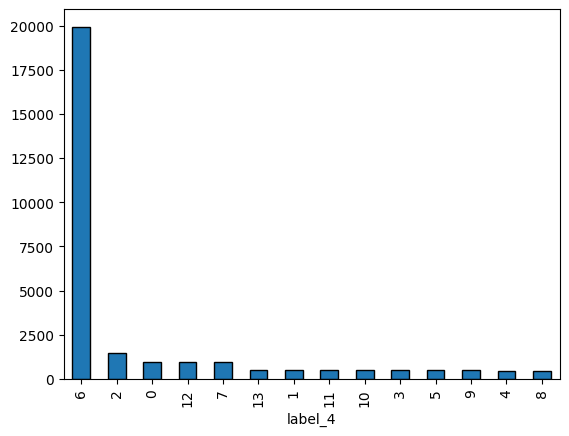

In [15]:
# y_train_label1_initial.value_counts().plot(kind='bar', edgecolor='black')
y_train_label1.value_counts().plot(kind='bar', edgecolor='black')

<Axes: xlabel='label_4'>

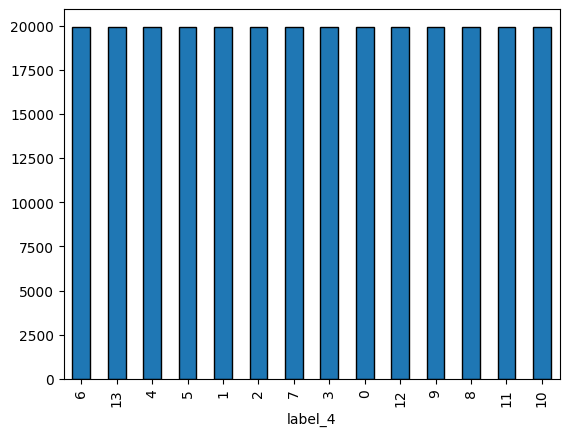

In [16]:
from imblearn.over_sampling import RandomOverSampler

RandomOversamples = RandomOverSampler(random_state=40)
X_train_label1_blanced, y_train_label1_balanced = RandomOversamples.fit_resample(X_train_label1, y_train_label1)
y_train_label1_balanced.value_counts().plot(kind='bar', edgecolor='black')

In [17]:
# standardize the data set
scaler = StandardScaler()
scaler.fit(X_train_label1)

component_names = X_train_label1.columns

# scale the data set using new scale
X_train_label1 = pd.DataFrame(scaler.transform(X_train_label1), columns=component_names)
X_train_label1_balanced = pd.DataFrame(scaler.transform(X_train_label1_blanced), columns=component_names)
X_test_label1 =  pd.DataFrame(scaler.transform(X_test_label1), columns=component_names)
X_test_predict_label1 = pd.DataFrame(scaler.transform(X_test_predict_label1), columns=component_names)

X_test_label1.head()
print(X_train_label1.shape)

(28520, 768)


### create a model using Random KNN before feature engineering

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[ 16   0   0   0   0   0   5   0   0   0   0   0   0   0]
 [  0   7   1   0   0   0   3   0   0   0   0   0   0   0]
 [  0   0  17   0   0   0   9   0   0   0   0   0   0   1]
 [  0   0   0   7   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   5   0  10   0   0   0   0   0   0   0]
 [  0   0   0   1   0   6   4   0   0   0   0   0   0   0]
 [  4   1   7   1   2   1 515   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0  13  17   0   0   0   0   1   0]
 [  0   0   0   1   0   0   8   0   9   0   0   0   0   1]
 [  0   0   0   0   0   0   7   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   7   0   0   0   2   1   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0  10   0   0]
 [  0   0   0   0   0   0  13   0   0   0   1   0  12   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   5]]
Accuracy: 0.8506666666666667
F1 Score: 0.836393819529093
Precision: 0.8528441963570416
Recall: 0.8506666666666667


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1_balanced, y_train_label1_balanced, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)


[[ 19   0   0   0   0   1   0   0   0   1   0   0   0   0]
 [  0   9   1   0   0   0   1   0   0   0   0   0   0   0]
 [  1   0  22   0   0   0   1   1   0   0   0   0   0   2]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   1   1   1  10   0   2   0   0   0   0   0   0   0]
 [  0   0   0   1   0   8   1   1   0   0   0   0   0   0]
 [ 11  11  28   9  10  10 394  14   4   4  11   1  10  15]
 [  0   0   1   0   0   0   2  27   0   0   0   0   1   1]
 [  0   0   0   1   0   0   3   0  13   0   0   0   1   1]
 [  0   0   2   1   1   0   4   1   0   8   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   8   1   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0  10   0   0]
 [  1   0   0   0   0   0   5   0   1   0   1   0  18   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   1   8]]
Accuracy: 0.7493333333333333
F1 Score: 0.7701295928532124
Precision: 0.8301419489907285
Recall: 0.7493333333333333


### create a model using Random SVC before feature engineering

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[ 20   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0  25   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   1   7   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  11   0   3   0   0   0   0   0   0   0]
 [  0   0   0   1   0   8   2   0   0   0   0   0   0   0]
 [  7   1  16   1   3   4 486   4   0   0   1   0   9   0]
 [  2   0   0   0   0   0   4  25   0   0   1   0   0   0]
 [  1   0   0   0   0   0   6   0  12   0   0   0   0   0]
 [  0   0   0   0   1   0   3   0   0  13   0   0   0   0]
 [  0   0   0   0   1   0   1   0   0   1   7   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1  10   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0  21   0]
 [  0   0   1   0   0   0   1   0   0   0   0   0   0   8]]
Accuracy: 0.8853333333333333
F1 Score: 0.8886319112299402
Precision: 0.900550141678451
Recall: 0.8853333333333333


### create a model using Random LRC before feature engineering

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[ 16   0   0   0   0   0   4   0   0   0   0   0   1   0]
 [  0   9   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0  21   0   0   0   5   0   0   0   0   0   1   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  11   0   3   0   0   0   0   1   0   0]
 [  0   0   0   0   0   9   2   0   0   0   0   0   0   0]
 [  3   0   8   0   3   1 511   2   1   1   0   0   2   0]
 [  0   0   1   0   0   0   7  23   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2   1  16   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0   0  13   0   0   0   0]
 [  0   0   0   0   1   0   2   0   0   1   6   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0  10   0   0]
 [  0   0   0   0   0   0  10   0   0   0   0   0  16   0]
 [  0   0   1   0   0   0   1   0   0   0   0   0   0   8]]
Accuracy: 0.9026666666666666
F1 Score: 0.90066701574545
Precision: 0.903086688968165
Recall: 0.9026666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1_balanced, y_train_label1_balanced, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[ 19   0   0   0   0   0   1   0   0   0   0   0   1   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  23   0   0   0   2   0   0   0   0   0   2   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  12   0   1   0   0   0   0   0   1   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [ 21   9  26   4  12   6 402  11   5   3   7   1  22   3]
 [  1   0   1   0   0   0   3  26   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   1  18   0   0   0   0   0]
 [  0   0   0   0   1   0   2   0   0  14   0   0   0   0]
 [  0   0   0   0   1   0   1   0   0   1   7   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1  10   0   0]
 [  0   0   0   0   0   0   2   0   1   1   0   1  21   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   9]]
Accuracy: 0.7866666666666666
F1 Score: 0.8031800954377344
Precision: 0.858026807466225
Recall: 0.7866666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Find best k features and select

    (before selecting features checked if k is enough to achieve a better accuracy and finally come up with k features is enough)

In [18]:
selected_features = getSelectedFeatures(350, X_train_label1, y_train_label1)

# print selected features
print(selected_features)

Index(['feature_1', 'feature_7', 'feature_15', 'feature_17', 'feature_22',
       'feature_25', 'feature_26', 'feature_28', 'feature_29', 'feature_31',
       ...
       'feature_757', 'feature_758', 'feature_759', 'feature_760',
       'feature_761', 'feature_763', 'feature_764', 'feature_765',
       'feature_767', 'feature_768'],
      dtype='object', length=350)


In [19]:
X_train_selected_label1 = X_train_label1[list(selected_features)]
X_train_selected_label1_balanced = X_train_label1_balanced[list(selected_features)]
X_test_selected_label1 = X_test_label1[list(selected_features)]
X_test_predict_selected_label1 = X_test_predict_label1[list(selected_features)]

### Check the accuracy of the selected features are enogh or not using KNN

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using KNN after redusing the features to create model: ")
print(classification_report)

[[ 18   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0   7   2   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0  18   0   0   0   8   0   0   0   0   0   0   1]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   5   0  10   0   0   0   0   0   0   0]
 [  0   0   0   0   0   6   5   0   0   0   0   0   0   0]
 [  5   1   6   1   0   0 518   0   0   0   0   1   0   0]
 [  2   1   0   0   0   0  11  18   0   0   0   0   0   0]
 [  0   0   2   1   0   0  10   0   5   0   0   0   0   1]
 [  0   0   0   0   0   0   8   0   0   9   0   0   0   0]
 [  0   0   0   0   0   0   6   0   0   0   4   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0  10   0   0]
 [  1   0   0   0   0   0  15   0   0   0   0   0  10   0]
 [  0   0   0   1   0   0   4   0   0   0   0   0   0   5]]
Accuracy: 0.8546666666666667
F1 Score: 0.838240033361518
Precision: 0.8692550893981841
Recall: 0.8546666666666667
using KNN after redusing the features to create model: 
<fu

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_selected_label1_balanced, y_train_label1_balanced, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using KNN after redusing the features to create model: ")
print(classification_report)

[[ 20   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0  10   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0  22   0   0   0   1   1   0   0   0   0   0   2]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   1   1   1  10   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   0   1   0   0   0   0   0   0]
 [ 12   9  31   9   9  12 392  18   7   3   9   1   9  11]
 [  2   0   2   0   0   0   2  25   0   0   0   0   1   0]
 [  0   0   0   1   0   0   3   0  13   0   0   0   1   1]
 [  0   0   1   1   2   0   3   1   0   9   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   9   1   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0  10   0   0]
 [  1   0   0   0   0   0   7   0   0   1   1   0  16   0]
 [  0   0   0   1   0   0   1   0   0   0   0   0   1   7]]
Accuracy: 0.748
F1 Score: 0.7677339916922508
Precision: 0.8287161869171262
Recall: 0.748
using KNN after redusing the features to create model: 
<function classification_rep

### Check the accuracy of the selected features are enogh or not using SVC

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using SVM after redusing the features to create model: ")

[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  10   0   0   0   0   1   0   0   0   0   0   0   0]
 [  1   0  21   0   1   0   4   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  12   0   2   0   0   0   0   0   0   0]
 [  0   0   0   1   0   9   1   0   0   0   0   0   0   0]
 [ 20   8  22   3  10   9 416  18   2   1   2   0  21   0]
 [  1   1   0   0   0   0   5  23   0   0   1   0   1   0]
 [  0   1   0   0   0   0   4   1  12   0   0   0   1   0]
 [  0   0   0   0   0   0   2   0   0  14   0   0   1   0]
 [  0   0   0   0   1   0   2   0   0   0   7   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   1   0   5   0   1   0   0   0  19   0]
 [  0   0   1   0   0   0   1   0   0   0   0   0   0   8]]
Accuracy: 0.788
F1 Score: 0.8029537730668687
Precision: 0.8453914884504208
Recall: 0.788
using SVM after redusing the features to create model: 


### Create a PCA to create new features using train data

In [23]:
pca, X_train_pca, X_test_pca, X_test_predict_pca = apply_pca(0.95, X_train_label1, X_test_label1, X_test_predict_label1)
print(X_test_pca.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'PC109', 'PC110',
       'PC111', 'PC112'],
      dtype='object', length=112)


<Axes: >

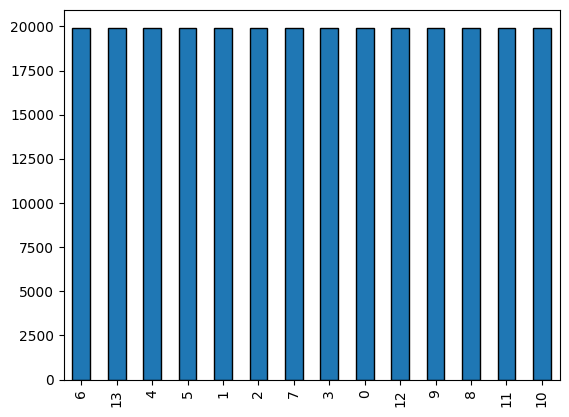

In [24]:
from imblearn.over_sampling import RandomOverSampler

RandomOversamples = RandomOverSampler(random_state=40)
X_train_pca_balanced, y_train_pca_balanced = RandomOversamples.fit_resample(X_train_pca, y_train_label1)
y_train_pca_balanced.value_counts().plot(kind='bar', edgecolor='black')

### Find the status of the model using KNN after joining PCAs

In [25]:
X_train_pca_balanced.head()
print(X_train_pca_balanced.shape)

(279132, 112)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca_balanced, y_train_pca_balanced, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")


[[ 19   0   0   0   0   1   0   0   0   1   0   0   0   0]
 [  0   9   1   0   0   0   1   0   0   0   0   0   0   0]
 [  1   0  22   0   0   0   1   1   0   0   0   0   0   2]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   1   1   1   9   0   3   0   0   0   0   0   0   0]
 [  0   0   0   1   0   8   1   1   0   0   0   0   0   0]
 [ 11  12  27   9  10  11 386  15   5   6  12   1  11  16]
 [  0   0   1   0   0   0   2  26   0   0   0   0   2   1]
 [  1   1   0   1   0   0   2   0  10   1   1   0   1   1]
 [  0   0   2   1   2   0   2   1   0   8   0   0   1   0]
 [  0   0   0   0   1   0   0   0   0   0   8   1   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0  10   0   0]
 [  2   0   0   0   0   0   6   0   0   0   1   0  17   0]
 [  0   0   0   0   1   0   1   0   0   0   0   0   0   8]]
Accuracy: 0.7306666666666667
F1 Score: 0.7538363514167522
Precision: 0.8209311471906012
Recall: 0.7306666666666667
Mean absolute error after adding new pca features of the m

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useLRC(X_train_pca, y_train_label1, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)


[[  9   0   0   0   0   0  12   0   0   0   0   0   0   0]
 [  0   6   0   0   0   0   5   0   0   0   0   0   0   0]
 [  0   0   8   0   0   0  19   0   0   0   0   0   0   0]
 [  0   0   0   7   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   6   0   7   0   0   0   0   1   0   1]
 [  0   0   0   0   0   6   5   0   0   0   0   0   0   0]
 [  2   5   8   2   3   2 496   5   3   0   0   0   5   1]
 [  0   0   0   0   0   0  21   9   0   0   0   0   2   0]
 [  0   1   0   0   0   0  12   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   6   0   0  11   0   0   0   0]
 [  0   0   0   0   1   0   6   0   0   0   2   0   1   0]
 [  0   0   0   0   0   0   1   0   0   0   0  10   0   0]
 [  0   0   1   0   0   0  16   1   0   0   0   0   8   0]
 [  0   0   1   1   0   0   1   0   0   0   0   0   0   7]]
Accuracy: 0.788
F1 Score: 0.7664218531347384
Precision: 0.7749016835016835
Recall: 0.788


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Find the status of the model using SVC after joining PCAs

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_pca, y_train_label1, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[ 20   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0  10   0   0   0   0   1   0   0   0   0   0   0   0]
 [  1   2  16   0   1   0   1   3   1   0   1   0   1   0]
 [  0   0   1   7   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  12   0   0   0   0   0   1   0   0   1]
 [  0   0   0   0   0   9   2   0   0   0   0   0   0   0]
 [ 47  27  59  13  23  24 230  44  24   3   7   1  28   2]
 [  3   2   1   0   1   0   2  22   0   0   0   0   1   0]
 [  0   2   1   0   1   0   3   1   9   0   0   0   2   0]
 [  0   0   0   0   0   0   3   1   1  11   1   0   0   0]
 [  0   0   1   0   1   0   2   0   0   0   6   0   0   0]
 [  0   0   0   0   1   0   1   0   0   0   0   9   0   0]
 [  1   0   1   0   1   0   4   4   1   0   0   0  14   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   2   7]]
Accuracy: 0.5093333333333333
F1 Score: 0.5482153591159307
Precision: 0.7585984795037319
Recall: 0.5093333333333333


### Hyper parameter Tuning

* hyper parameter tuning using KNN model

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

ran_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
rs = RandomizedSearchCV(KNeighborsClassifier(), ran_params, verbose = 1, n_jobs = -1)
rs.fit(X_train_label1, y_train_label1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=1)

In [30]:
print(rs.best_params_)
print(rs.best_estimator_.get_params())

{'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [31]:
predict1 = rs.predict(X_test_label1)
accuracy_score(y_test_label1, predict1)

0.8413333333333334

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = RandomizedSearchCV(logModel, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)
clf.fit(X_train_label1, y_train_label1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   verbose=True)

In [21]:
print(clf.best_params_)
print(clf.best_estimator_.get_params())

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': 0.23357214690901212}
{'C': 0.23357214690901212, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [22]:
predict3 = clf.predict(X_test_label1)
accuracy_score(y_test_label1, predict3)

0.8986666666666666

## Get best prediction

In [24]:

lrc = LogisticRegression(random_state=0)
lrc.fit(X_train_label1, y_train_label1)
y_pred = lrc.predict(X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

y_pred_test = lrc.predict(X_test_predict_label1)

[[ 16   0   0   0   0   0   4   0   0   0   0   0   1   0]
 [  0   9   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0  21   0   0   0   5   0   0   0   0   0   1   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  11   0   3   0   0   0   0   1   0   0]
 [  0   0   0   0   0   9   2   0   0   0   0   0   0   0]
 [  3   0   8   0   3   1 511   2   1   1   0   0   2   0]
 [  0   0   1   0   0   0   7  23   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2   1  16   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0   0  13   0   0   0   0]
 [  0   0   0   0   1   0   2   0   0   1   6   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0  10   0   0]
 [  0   0   0   0   0   0  10   0   0   0   0   0  16   0]
 [  0   0   1   0   0   0   1   0   0   0   0   0   0   8]]
Accuracy: 0.9026666666666666
F1 Score: 0.90066701574545
Precision: 0.903086688968165
Recall: 0.9026666666666666


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
df = pd.DataFrame(y_pred_test, columns =["label_4"] )
df.head()
df.to_csv("Project_Layer_12_Label_4_new.csv", index=False)